In [1]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

In [2]:
#BHP_2007 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\bob-hall-2007-output.csv')
BHP_2007 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\2007-08 NWLON Station 6min Corrections\bob-hall-2007-output.csv')
#BHP_2008 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\bob-hall-2008-output.csv')
BHP_2008 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\2007-08 NWLON Station 6min Corrections\bob-hall-2008-output.csv')
BHP_2007.drop(labels=range(0,40),axis=0, inplace=True)
BHP_2007.reset_index(drop = True, inplace=True)
BHP_2008.drop(labels=range(0,2),axis=0, inplace=True)
BHP_2008.reset_index(drop = True, inplace=True)
BHP_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
BHP_2007['Dates'] = pd.to_datetime(BHP_2007['Date'])
BHP_2007['Water Level'] = pd.to_numeric(BHP_2007['Water Level'], errors='coerce')
BHP_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
BHP_2008['Dates'] = pd.to_datetime(BHP_2008['Date'])
BHP_2008['Water Level'] = pd.to_numeric(BHP_2008['Water Level'], errors='coerce')
BHP = pd.concat([BHP_2007,BHP_2008],ignore_index=True)

In [3]:
#bhp_light9300 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_1993-2000_pwl_harmwl_bwl.csv')
bhp_light9300 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Bob Hall Pier\BobHallPier_1993-2000_pwl_harmwl_bwl.csv')
bhp_light9300.drop(labels=range(701280,701286),axis = 0, inplace = True)

#bhp_light0112 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
bhp_light0112 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Bob Hall Pier\BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
bhp_light0112.drop(labels=range(1051920,1051926), axis = 0, inplace=True)


#bhp_light1323 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2013-2023_pwl_harmwl_bwl.csv')
bhp_light1323 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Bob Hall Pier\BobHallPier_2013-2023_pwl_harmwl_bwl.csv')
bhp_light1323.drop(labels=range(len(bhp_light1323)-6,len(bhp_light1323)), axis=0, inplace=True)
frames = [bhp_light9300,bhp_light0112,bhp_light1323]
bhp_light = pd.concat(frames, ignore_index=True)
len(bhp_light)
#directory_path = '/Users/rprocious/Downloads/data/NOAA/bobHallPier/'
directory_path = r'C:\Users\mrpro\Documents\Code\CBI\data 2\NOAA\bobHallPier'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

bhp_NOAA = pd.concat(dataframes, ignore_index=True)
bhp_NOAA.drop(labels=range(0,3), axis=0, inplace=True)
bhp_NOAA.drop(labels=range(2304169,2304171), axis=0, inplace=True)
bhp_light.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
bhp_light['#date+time'] = pd.to_datetime(bhp_light['#date+time'])
bhp_light['014-pwl'] = pd.to_numeric(bhp_light['014-pwl'], errors='coerce')



#converting NOAA dataset to date time and numeric values
bhp_NOAA.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
bhp_NOAA['Date Time'] = pd.to_datetime(bhp_NOAA['Date Time'])
bhp_NOAA[' Water Level'] = pd.to_numeric(bhp_NOAA[' Water Level'], errors = 'coerce')

#remove all light house data till 1996 because thats when NOAA data begins
bhp_light.drop(labels=range(0,262800),axis=0, inplace=True)

bhp_light.reset_index(drop = True, inplace=True)
comparison_df = pd.DataFrame()
comparison_df['Dates'] = bhp_light['#date+time']
comparison_df['Lighthouse WL'] = bhp_light['014-pwl']
comparison_df['NOAA WL'] = bhp_NOAA[' Water Level']
comparison_df['Shifted NOAA'] = comparison_df['NOAA WL'].shift(-3)

C:\Users\mrpro\AppData\Local\Temp\ipykernel_27468\2646977585.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  bhp_light0112 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Bob Hall Pier\BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
C:\Users\mrpro\AppData\Local\Temp\ipykernel_27468\2646977585.py:11: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  bhp_light1323 = pd.read_csv(r'C:\Users\mrpro\Documents\Code\CBI\data 2\lighthouse\Bob Hall Pier\BobHallPier_2013-2023_pwl_harmwl_bwl.csv')


Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

c:\Users\mrpro\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\mrpro\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


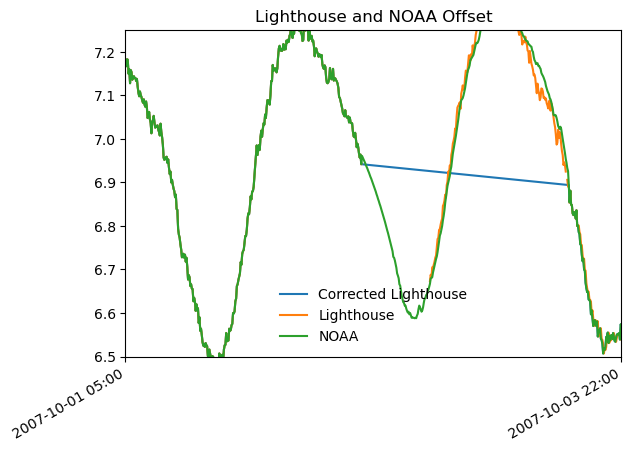

In [4]:
plt.plot(BHP['Dates'],BHP['Water Level'],label = 'Corrected Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-01 05:00')

end_date = pd.to_datetime('2007-10-03 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

In [5]:
total_df = BHP.merge(comparison_df,on='Dates',how='outer')


In [6]:
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='NOAA WL',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NOAA WL'] = total_df['Shifted NOAA']
total_df['NES WL'] = total_df["Water Level"]
total_df

,Water Level,Dates,Lighthouse WL,Shifted NOAA,NOAA WL,NES WL
0,NaN,1996-01-01 00:00:00,6.800,6.800,6.800,NaN
1,NaN,1996-01-01 00:06:00,6.773,6.773,6.773,NaN
2,NaN,1996-01-01 00:12:00,6.806,6.806,6.806,NaN
3,NaN,1996-01-01 00:18:00,6.833,6.833,6.833,NaN
4,NaN,1996-01-01 00:24:00,6.869,6.869,6.869,NaN
...,...,...,...,...,...,...
2454501,NaN,2023-12-31 23:30:00,NaN,NaN,NaN,NaN
2454502,NaN,2023-12-31 23:36:00,NaN,NaN,NaN,NaN
2454503,NaN,2023-12-31 23:42:00,NaN,NaN,NaN,NaN
2454504,NaN,2023-12-31 23:48:00,NaN,NaN,NaN,NaN


Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

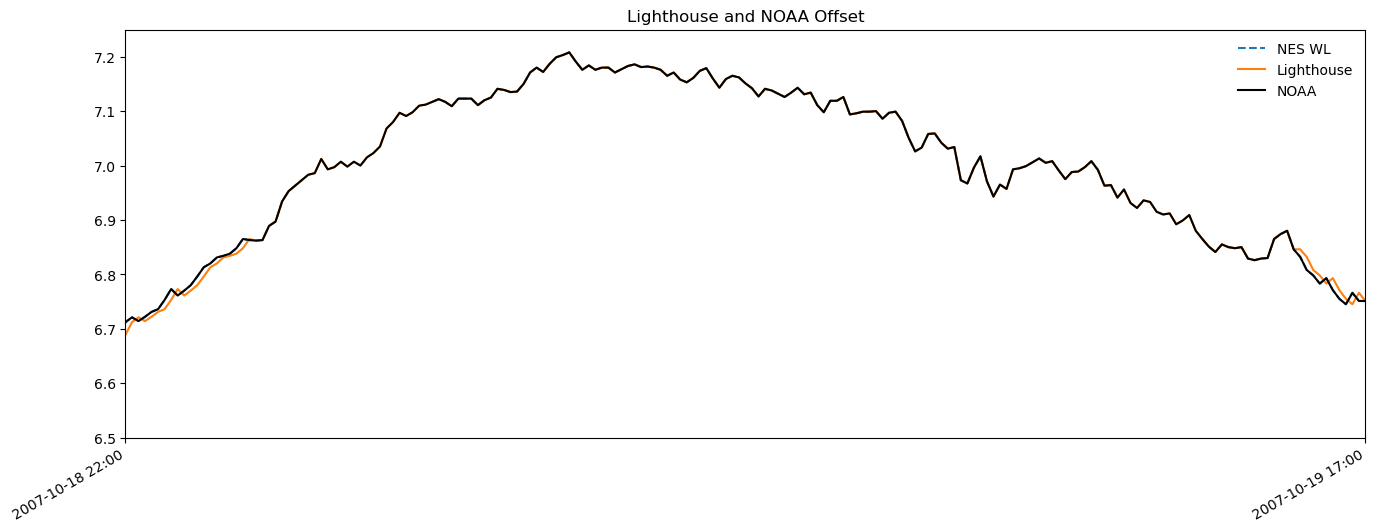

In [7]:
plt.figure(figsize=(16,6))
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-18 22:00')

end_date = pd.to_datetime('2007-10-19 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

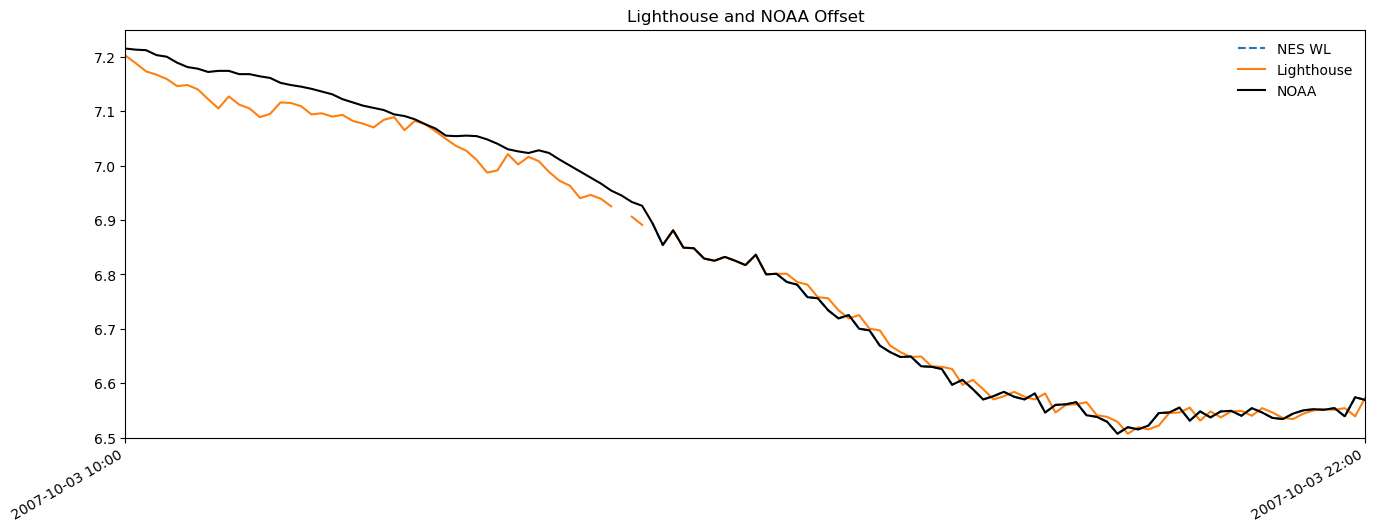

In [8]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-03 10:00')

end_date = pd.to_datetime('2007-10-03 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

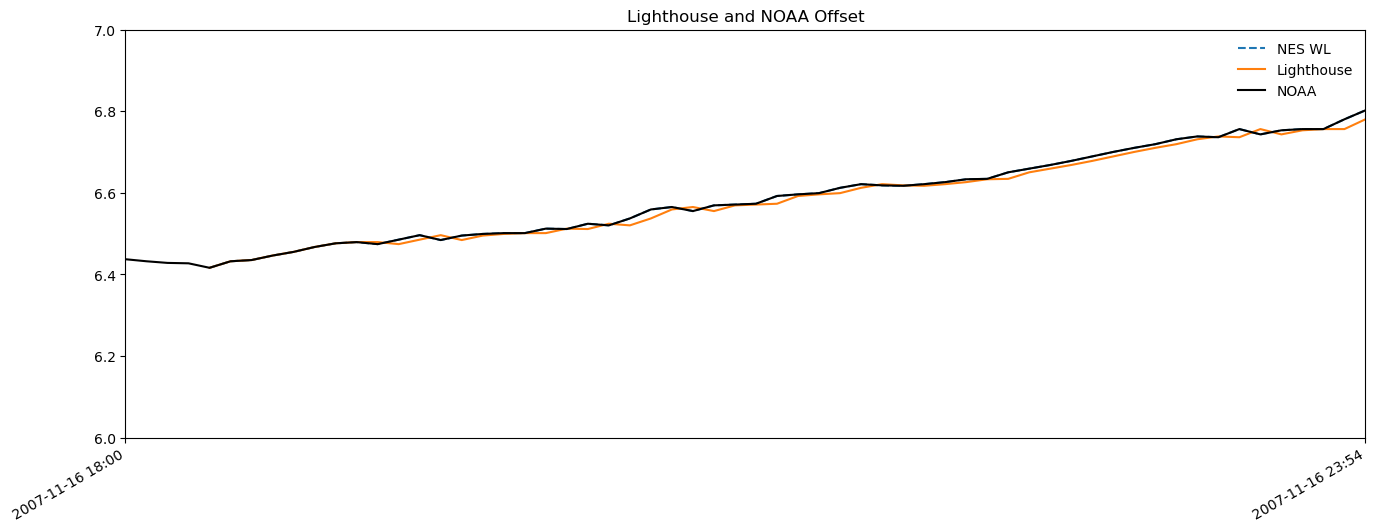

In [9]:
plt.figure(figsize=(16,6))
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,7)

start_date = pd.to_datetime('2007-11-16 18:00')

end_date = pd.to_datetime('2007-11-16 23:54')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

In [10]:
stats_df = difference_df(total_df)
stats_df

,NES,NOAA,Difference
964320,6.861,6.861,0.0
964321,6.851,6.851,0.0
964322,6.848,6.848,0.0
964323,6.855,6.855,0.0
964324,6.865,6.865,0.0
...,...,...,...
1139781,6.795,6.795,0.0
1139782,6.796,6.796,0.0
1139783,6.782,6.782,0.0
1139784,NaN,6.774,NaN


In [11]:
non_zero_non_nan_rows = stats_df[stats_df['Difference'].notna() & (stats_df['Difference'] != 0)]

non_zero_non_nan_dates = total_df.loc[non_zero_non_nan_rows.index, 'Dates'].tolist()
non_zero_non_nan_values = non_zero_non_nan_rows['Difference'].tolist()

print(non_zero_non_nan_dates)
print(non_zero_non_nan_values)
len(non_zero_non_nan_rows)

[Timestamp('2007-01-04 21:00:00'), Timestamp('2007-01-05 01:36:00'), Timestamp('2007-01-05 01:48:00'), Timestamp('2007-01-05 14:48:00'), Timestamp('2007-01-05 15:06:00'), Timestamp('2007-01-16 10:42:00'), Timestamp('2007-01-16 10:48:00'), Timestamp('2007-01-16 11:06:00'), Timestamp('2007-01-16 11:18:00'), Timestamp('2007-01-17 04:00:00'), Timestamp('2007-01-17 04:06:00'), Timestamp('2007-01-17 04:12:00'), Timestamp('2007-01-17 04:18:00'), Timestamp('2007-01-17 04:24:00'), Timestamp('2007-01-17 04:30:00'), Timestamp('2007-01-17 04:36:00'), Timestamp('2007-01-17 04:42:00'), Timestamp('2007-01-17 04:48:00'), Timestamp('2007-01-17 04:54:00'), Timestamp('2007-01-17 05:00:00'), Timestamp('2007-01-17 05:06:00'), Timestamp('2007-01-17 05:12:00'), Timestamp('2007-01-17 05:18:00'), Timestamp('2007-01-17 05:24:00'), Timestamp('2007-01-17 05:30:00'), Timestamp('2007-01-17 05:36:00'), Timestamp('2007-01-17 05:42:00'), Timestamp('2007-01-17 05:48:00'), Timestamp('2007-01-17 05:54:00'), Timestamp('20

401

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

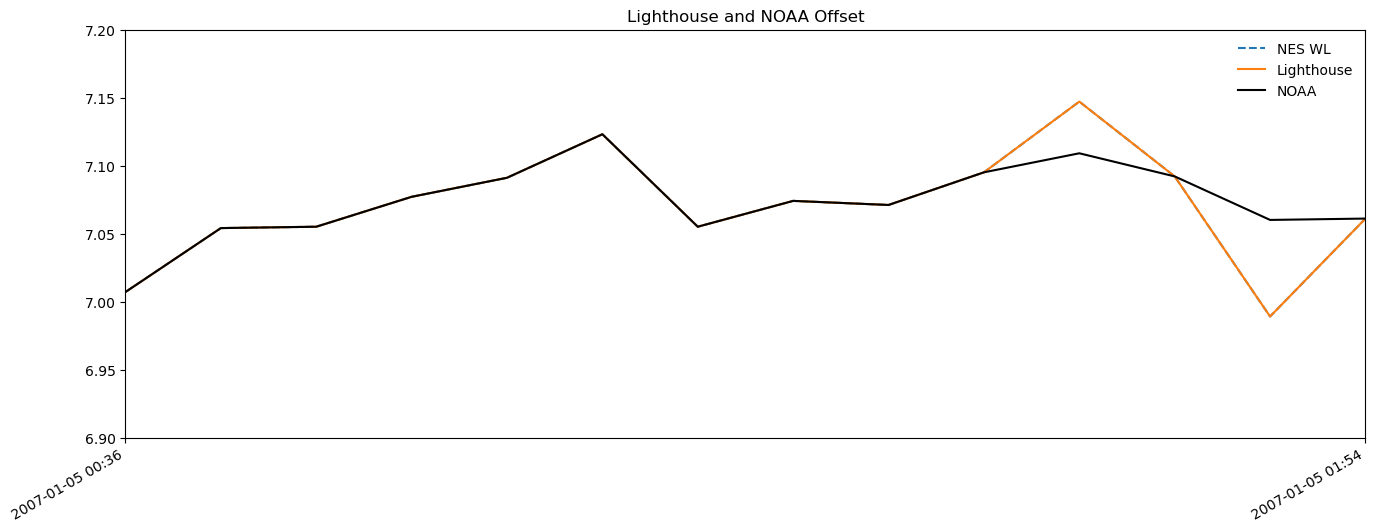

In [12]:
#Lighthouse and NES have the same values that differ from NOAA


plt.figure(figsize=(16,6))
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.9,7.2)

start_date = pd.to_datetime('2007-01-05 00:36')

end_date = pd.to_datetime('2007-01-05 01:54')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

In [13]:
(401/175466)*100

0.22853430294188046

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

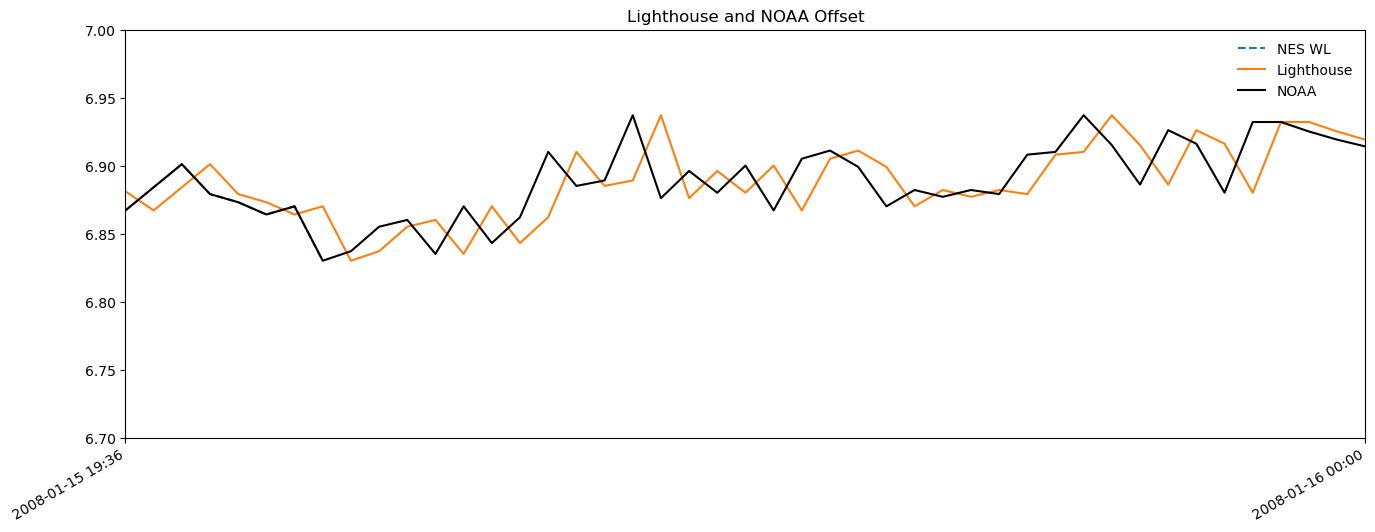

In [14]:
#Lighthouse and NES have the same values that differ from NOAA


plt.figure(figsize=(16,6))
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.7,7)

start_date = pd.to_datetime('2008-01-15 19:36')

end_date = pd.to_datetime('2008-01-16 00:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

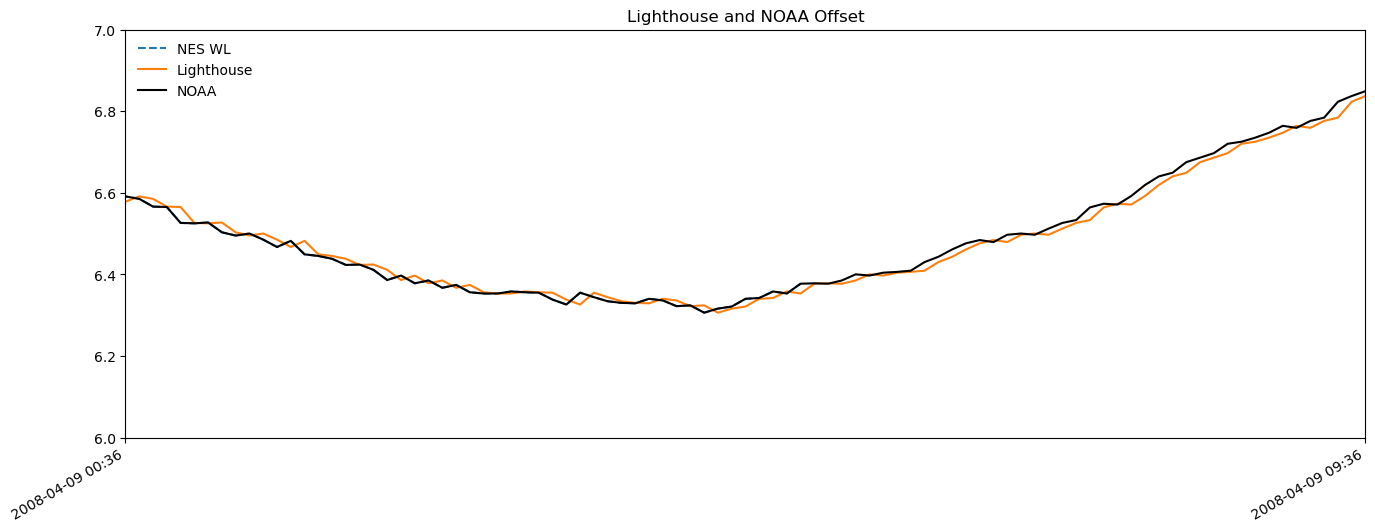

In [15]:

plt.figure(figsize=(16,6))
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6,7)

start_date = pd.to_datetime('4/9/2008 0:36')

end_date = pd.to_datetime('4/9/2008 9:36')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

Text(0.5, 1.0, 'Bob Hall Pier Missing Data 1')

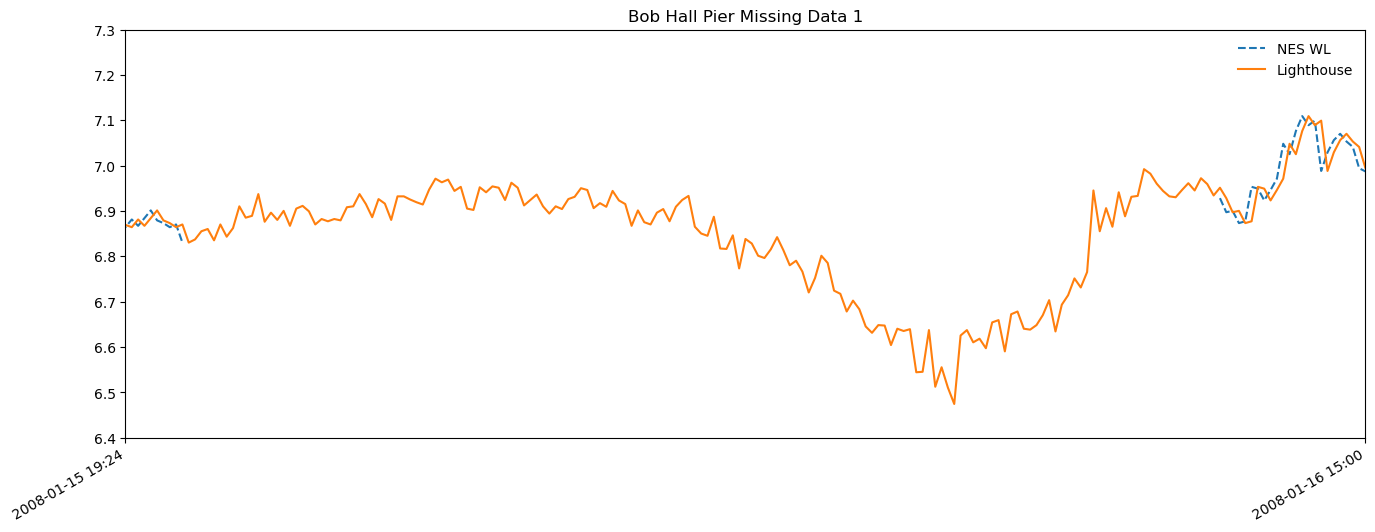

In [21]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(6.4,7.3)

start_date = pd.to_datetime('1/15/2008 19:24')

end_date = pd.to_datetime('1/16/2008 15:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Bob Hall Pier Missing Data 1')

Text(0.5, 1.0, 'Bob Hall Pier Missing Data 2')

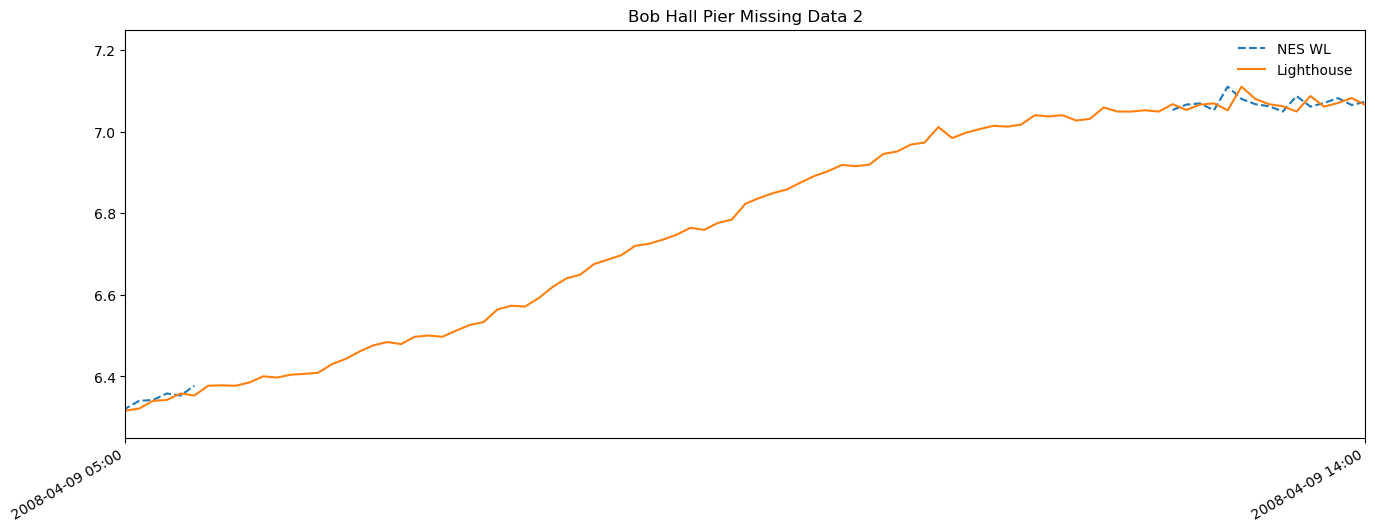

In [24]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(6.25,7.25)

start_date = pd.to_datetime('4/9/2008 05:00')

end_date = pd.to_datetime('4/9/2008 14:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Bob Hall Pier Missing Data 2')

Text(0.5, 1.0, 'BHP Missing Data 3')

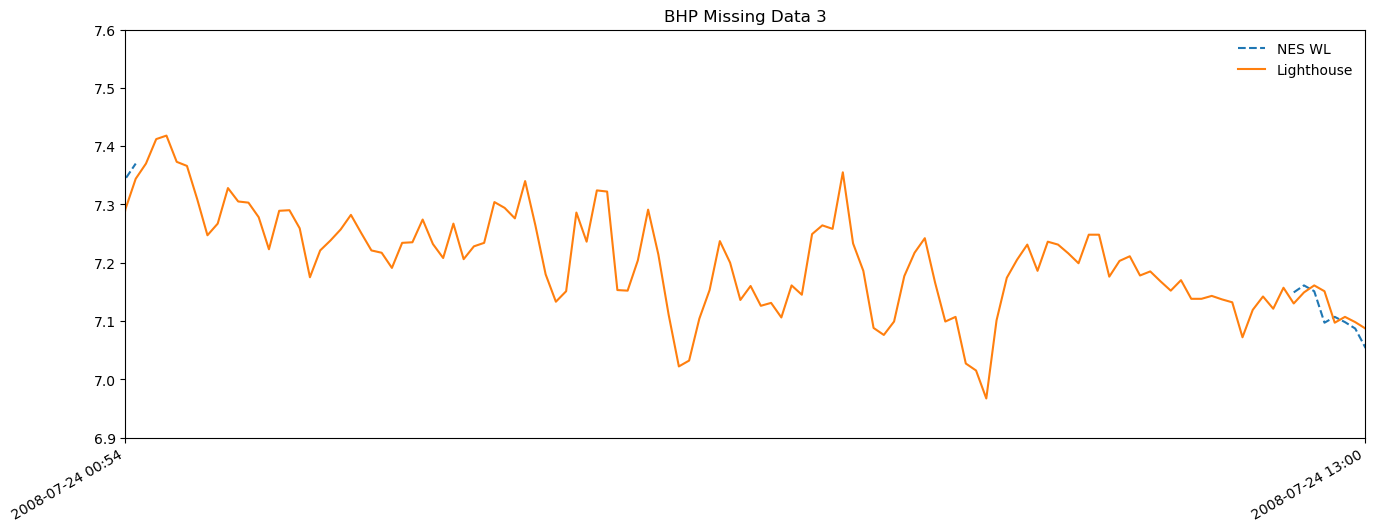

In [27]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(6.9,7.6)

start_date = pd.to_datetime('7/24/2008 00:54')

end_date = pd.to_datetime('7/24/2008 13:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('BHP Missing Data 3')

Text(0.5, 1.0, 'BHP Double Point')

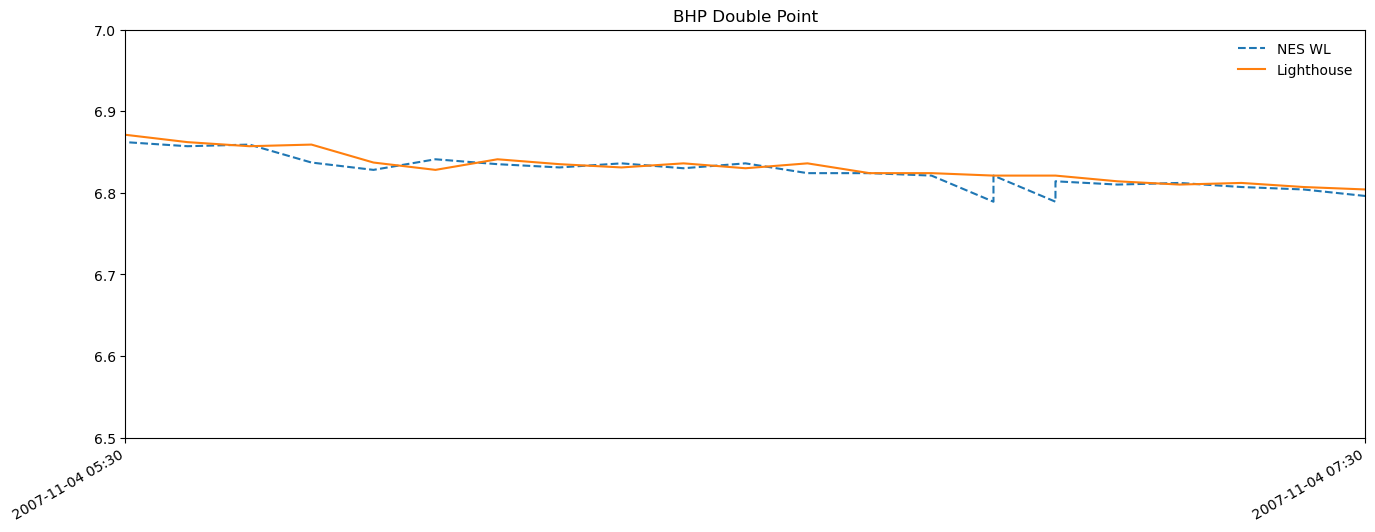

In [28]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7)

start_date = pd.to_datetime('11/4/2007 5:30')

end_date = pd.to_datetime('11/4/2007 7:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('BHP Double Point')

Text(0.5, 1.0, 'BHP Double Point')

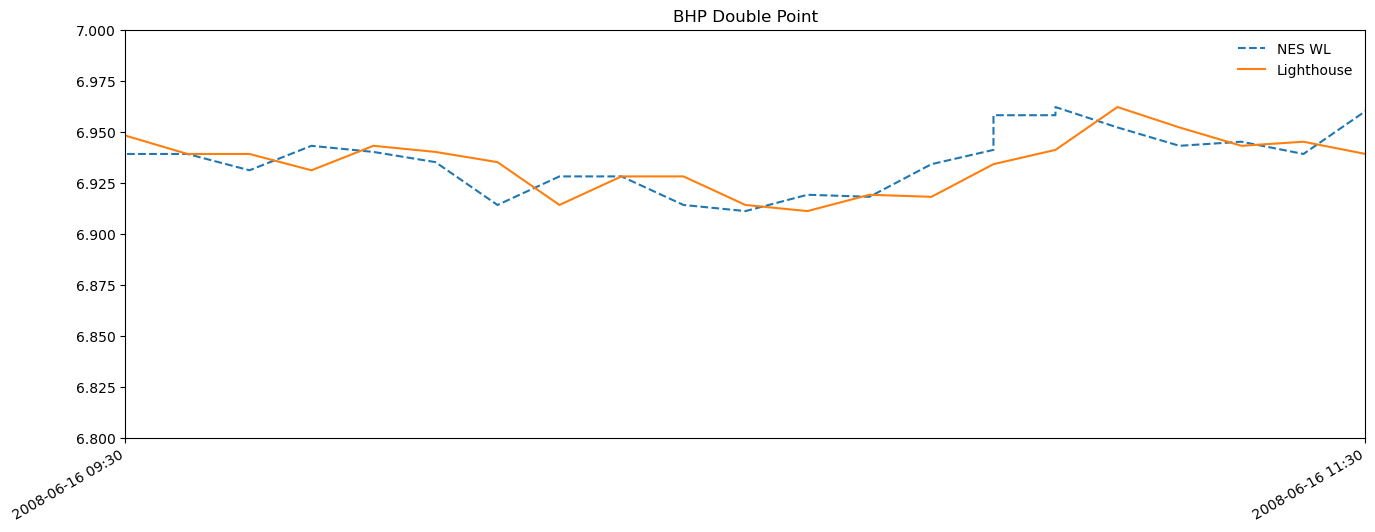

In [30]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

#plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(6.8,7)

start_date = pd.to_datetime('6/16/2008 09:30')

end_date = pd.to_datetime('6/16/2008 11:30')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('BHP Double Point')